# Importamos librerias

In [1]:
import torch
import numpy as np
import random
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim

In [2]:
train_matrices_3d = np.load('data_split/train_matrices.npy', allow_pickle=True)

In [6]:
# Cargar las matrices enriquecidas para todos los casos de testeo
test_matrices_0 = np.load('data_split/test_matrices_0.npy', allow_pickle=True)
test_matrices_1a = np.load('data_split/test_matrices_1a.npy', allow_pickle=True)
test_matrices_2a = np.load('data_split/test_matrices_2a.npy', allow_pickle=True)
test_matrices_3a = np.load('data_split/test_matrices_3a.npy', allow_pickle=True)
test_matrices_4 = np.load('data_split/test_matrices_4.npy', allow_pickle=True)
test_matrices_1b = np.load('data_split/test_matrices_1b.npy', allow_pickle=True)
test_matrices_2b = np.load('data_split/test_matrices_2b.npy', allow_pickle=True)
test_matrices_3b = np.load('data_split/test_matrices_3b.npy', allow_pickle=True)

# Cargar las etiquetas correspondientes a cada caso
test_cases_0 = np.load('data_split/test_cases_0.npy', allow_pickle=True)
test_cases_1a = np.load('data_split/test_cases_1a.npy', allow_pickle=True)
test_cases_2a = np.load('data_split/test_cases_2a.npy', allow_pickle=True)
test_cases_3a = np.load('data_split/test_cases_3a.npy', allow_pickle=True)
test_cases_4 = np.load('data_split/test_cases_4.npy', allow_pickle=True)
test_cases_1b = np.load('data_split/test_cases_1b.npy', allow_pickle=True)
test_cases_2b = np.load('data_split/test_cases_2b.npy', allow_pickle=True)
test_cases_3b = np.load('data_split/test_cases_3b.npy', allow_pickle=True)

# Cargar los índices originales de las secuencias para cada caso
test_indices_0 = np.load('data_split/test_indices_0.npy', allow_pickle=True)
test_indices_1a = np.load('data_split/test_indices_1a.npy', allow_pickle=True)
test_indices_2a = np.load('data_split/test_indices_2a.npy', allow_pickle=True)
test_indices_3a = np.load('data_split/test_indices_3a.npy', allow_pickle=True)
test_indices_4 = np.load('data_split/test_indices_4.npy', allow_pickle=True)
test_indices_1b = np.load('data_split/test_indices_1b.npy', allow_pickle=True)
test_indices_2b = np.load('data_split/test_indices_2b.npy', allow_pickle=True)
test_indices_3b = np.load('data_split/test_indices_3b.npy', allow_pickle=True)

# Verificación de carga

In [7]:
# Verificar las formas de los datos
print(f"Matrices de test del caso 0: {test_matrices_0.shape}")
print(f"Etiquetas del caso 0: {test_cases_0.shape}")
print(f"Índices del caso 0: {test_indices_0.shape}")

# Repetir para otros casos, por ejemplo:
print(f"Matrices de test del caso 1a: {test_matrices_1a.shape}")
print(f"Etiquetas del caso 1a: {test_cases_1a.shape}")
print(f"Índices del caso 1a: {test_indices_1a.shape}")


Matrices de test del caso 0: (300, 58, 7)
Etiquetas del caso 0: (300,)
Índices del caso 0: (300, 7)
Matrices de test del caso 1a: (300, 58, 7)
Etiquetas del caso 1a: (300,)
Índices del caso 1a: (300, 7)


# Creacion de pares

1. Seleccionar una muestra representativa del dataset sano

In [8]:
# Generar pares y etiquetas para un conjunto de testeo
def generate_test_pairs_with_labels(test_matrices, sano_sample, test_cases, test_indices):
    """
    Genera pares de testeo, incluyendo pares positivos (sano con sano) y negativos (sano con dañado),
    manteniendo la temporalidad de los datos.

    Parámetros:
    - test_matrices: Matrices enriquecidas del conjunto de testeo.
    - sano_sample: Muestra representativa del estado sano.
    - test_cases: Etiquetas de los casos de testeo.
    - test_indices: Índices originales de las muestras de testeo.

    Retorna:
    - pairs: Lista de pares generados.
    - labels: Etiquetas (0 para positivo, 1 para negativo).
    - indices: Índices originales de las muestras de testeo.
    """
    pairs = []
    labels = []
    indices = []

    for idx, test_sample in enumerate(test_matrices):
        if test_cases[idx] == '0':  # Si es un dato sano
            # Par positivo: sano con sano
            pairs.append([sano_sample, test_sample])
            labels.append(0)  # Etiqueta positiva
        else:
            # Par negativo: sano con dañado
            pairs.append([sano_sample, test_sample])
            labels.append(1)  # Etiqueta negativa

        indices.append(test_indices[idx])  # Guardar índice original

    return np.array(pairs), np.array(labels), np.array(indices)


In [9]:
# Tomar una muestra del dataset de entrenamiento sano
training_sano_sample = train_matrices_3d[0]  # Primera muestra sana

In [10]:
# Generar pares para caso 0
pairs_0, labels_0, indices_0 = generate_test_pairs_with_labels(
    test_matrices_0, training_sano_sample, test_cases_0, test_indices_0
)

# Generar pares para caso 1a
pairs_1a, labels_1a, indices_1a = generate_test_pairs_with_labels(
    test_matrices_1a, training_sano_sample, test_cases_1a, test_indices_1a
)

# Generar pares para caso 2a
pairs_2a, labels_2a, indices_2a = generate_test_pairs_with_labels(
    test_matrices_2a, training_sano_sample, test_cases_2a, test_indices_2a
)

# Generar pares para caso 3a
pairs_3a, labels_3a, indices_3a = generate_test_pairs_with_labels(
    test_matrices_3a, training_sano_sample, test_cases_3a, test_indices_3a
)

# Generar pares para caso 4
pairs_4, labels_4, indices_4 = generate_test_pairs_with_labels(
    test_matrices_4, training_sano_sample, test_cases_4, test_indices_4
)

# Generar pares para caso 1b
pairs_1b, labels_1b, indices_1b = generate_test_pairs_with_labels(
    test_matrices_1b, training_sano_sample, test_cases_1b, test_indices_1b
)

# Generar pares para caso 2b
pairs_2b, labels_2b, indices_2b = generate_test_pairs_with_labels(
    test_matrices_2b, training_sano_sample, test_cases_2b, test_indices_2b
)

# Generar pares para caso 3b
pairs_3b, labels_3b, indices_3b = generate_test_pairs_with_labels(
    test_matrices_3b, training_sano_sample, test_cases_3b, test_indices_3b
)


In [11]:
# Verificar la forma de los pares generados
print(f"Forma de los pares para caso 0: {pairs_0.shape}")
# Verificar las primeras etiquetas generadas
print(f"Ejemplo de etiquetas para caso 0 (deben ser todas 0): {labels_0[:10]}")
# Verificar los índices originales asociados a los pares
print(f"Índices originales para caso 0: {indices_0[:10]}")
# Confirmar que todas las etiquetas son 0
all_labels_zero = (labels_0 == 0).all()
print(f"¿Todas las etiquetas son 0? {'Sí' if all_labels_zero else 'No'}")


Forma de los pares para caso 0: (300, 2, 58, 7)
Ejemplo de etiquetas para caso 0 (deben ser todas 0): [0 0 0 0 0 0 0 0 0 0]
Índices originales para caso 0: [[790 791 792 793 794 795 796]
 [791 792 793 794 795 796 797]
 [792 793 794 795 796 797 798]
 [793 794 795 796 797 798 799]
 [794 795 796 797 798 799 800]
 [795 796 797 798 799 800 801]
 [796 797 798 799 800 801 802]
 [797 798 799 800 801 802 803]
 [798 799 800 801 802 803 804]
 [799 800 801 802 803 804 805]]
¿Todas las etiquetas son 0? Sí


In [12]:
print(f"Forma de los pares para caso 1a: {pairs_1a.shape}")
print(f"Ejemplo de etiquetas para caso 1a: {labels_1a[:10]}")  # Debería contener 0 (positivo) o 1 (negativo)
print(f"Índices originales para caso 1a: {indices_1a[:10]}")


Forma de los pares para caso 1a: (300, 2, 58, 7)
Ejemplo de etiquetas para caso 1a: [1 1 1 1 1 1 1 1 1 1]
Índices originales para caso 1a: [[1886 1887 1888 1889 1890 1891 1892]
 [1887 1888 1889 1890 1891 1892 1893]
 [1888 1889 1890 1891 1892 1893 1894]
 [1889 1890 1891 1892 1893 1894 1895]
 [1890 1891 1892 1893 1894 1895 1896]
 [1891 1892 1893 1894 1895 1896 1897]
 [1892 1893 1894 1895 1896 1897 1898]
 [1893 1894 1895 1896 1897 1898 1899]
 [1894 1895 1896 1897 1898 1899 1900]
 [1895 1896 1897 1898 1899 1900 1901]]


In [13]:
# Verificar la cantidad de pares generados para cada conjunto de testeo
print(f"Cantidad de pares para caso 0: {len(pairs_0)}")
print(f"Cantidad de pares para caso 1a: {len(pairs_1a)}")
print(f"Cantidad de pares para caso 2a: {len(pairs_2a)}")
print(f"Cantidad de pares para caso 3a: {len(pairs_3a)}")
print(f"Cantidad de pares para caso 4: {len(pairs_4)}")
print(f"Cantidad de pares para caso 1b: {len(pairs_1b)}")
print(f"Cantidad de pares para caso 2b: {len(pairs_2b)}")
print(f"Cantidad de pares para caso 3b: {len(pairs_3b)}")

Cantidad de pares para caso 0: 300
Cantidad de pares para caso 1a: 300
Cantidad de pares para caso 2a: 300
Cantidad de pares para caso 3a: 300
Cantidad de pares para caso 4: 300
Cantidad de pares para caso 1b: 1090
Cantidad de pares para caso 2b: 1090
Cantidad de pares para caso 3b: 1090


In [14]:
import torch
from torch.utils.data import DataLoader, Dataset

In [15]:
class SiameseDataset(Dataset):
    def __init__(self, pairs, pair_labels):
        self.pairs = pairs
        self.pair_labels = pair_labels

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        # Eliminar la dimensión extra aquí
        x1 = torch.tensor(self.pairs[idx][0].squeeze(), dtype=torch.float32)
        x2 = torch.tensor(self.pairs[idx][1].squeeze(), dtype=torch.float32)
        label = torch.tensor(self.pair_labels[idx], dtype=torch.float32)
        return x1, x2, label

In [16]:
# Crear datasets para cada conjunto de testeo
test_dataset_0 = SiameseDataset(pairs_0, labels_0)
test_dataset_1a = SiameseDataset(pairs_1a, labels_1a)
test_dataset_2a = SiameseDataset(pairs_2a, labels_2a)
test_dataset_3a = SiameseDataset(pairs_3a, labels_3a)
test_dataset_4 = SiameseDataset(pairs_4, labels_4)
test_dataset_1b = SiameseDataset(pairs_1b, labels_1b)
test_dataset_2b = SiameseDataset(pairs_2b, labels_2b)
test_dataset_3b = SiameseDataset(pairs_3b, labels_3b)

In [17]:
from torch.utils.data import DataLoader

# Crear DataLoaders para cada conjunto de testeo
batch_size = 32
test_loader_0 = DataLoader(test_dataset_0, batch_size=batch_size, shuffle=False)
test_loader_1a = DataLoader(test_dataset_1a, batch_size=batch_size, shuffle=False)
test_loader_2a = DataLoader(test_dataset_2a, batch_size=batch_size, shuffle=False)
test_loader_3a = DataLoader(test_dataset_3a, batch_size=batch_size, shuffle=False)
test_loader_4 = DataLoader(test_dataset_4, batch_size=batch_size, shuffle=False)
test_loader_1b = DataLoader(test_dataset_1b, batch_size=batch_size, shuffle=False)
test_loader_2b = DataLoader(test_dataset_2b, batch_size=batch_size, shuffle=False)
test_loader_3b = DataLoader(test_dataset_3b, batch_size=batch_size, shuffle=False)

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt

In [19]:
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

# Establecer la semilla
set_seed(42)

In [20]:
class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv1d(58, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(2, stride=2),
            nn.Conv1d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(2, stride=2)
        )
        self.fc = nn.Sequential(
            nn.Linear(256 * 1, 256),  # Ajustar el tamaño de entrada según el tamaño de salida de Conv1d
            nn.ReLU(inplace=True),
            nn.Linear(256, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, 64)
        )
        
        self.final_fc = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward_once(self, x):
        output = self.cnn(x)
        output = output.view(output.size()[0], -1)
        output = self.fc(output)
        return output

    def forward(self, x1, x2):
        output1 = self.forward_once(x1)
        output2 = self.forward_once(x2)
        abs_diff = torch.abs(output1 - output2)
        output = self.final_fc(abs_diff)
        output = self.sigmoid(output)
        return output

In [21]:
# Llamar a la función de semilla antes de instanciar cualquier cosa
set_seed(42)

# Definir el modelo, la función de pérdida y el optimizador
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = SiameseNetwork().to(device)  # Asegurar que los pesos iniciales sean reproducibles
criterion = nn.BCELoss().to(device)  # Binary Cross-Entropy Loss

In [22]:
# Cargar los pesos guardados en la arquitectura del modelo
model.load_state_dict(torch.load('best_siamese_model_prueba_final.pth'))
print("Model loaded with best weights from training")

Model loaded with best weights from training


In [23]:
def evaluate_test_pairs(model, criterion, test_dataloader, device):
    model.eval()
    running_test_loss = 0.0
    
    all_labels  = []  # etiquetas 0/1 reales
    all_preds   = []  # etiquetas 0/1 después de umbral
    all_scores  = []  # probabilidades o scores crudos → p(x1,x2)

    with torch.no_grad():
        for batch_idx, (x1, x2, labels) in enumerate(test_dataloader):
            # Enviar a dispositivo
            x1, x2 = x1.to(device), x2.to(device)
            labels = labels.to(device).view(-1, 1).float()
            
            # Inferencia
            output = model(x1, x2)          # shape (batch,1) con Sigmoid
            loss   = criterion(output, labels)
            running_test_loss += loss.item()
            
            # Guardar resultados
            preds  = (output >= 0.5).float()          # decisión con τ=0.5
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_scores.extend(output.cpu().numpy())   # ← necesario para ROC

    test_loss = running_test_loss / len(test_dataloader)
    
    return test_loss, all_labels, all_preds, all_scores #error testeo, etiquetas reales, predicciones, scores-salida prob salida

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

def calculate_and_print_metrics(test_loss, all_labels, all_preds):
    accuracy = (np.array(all_preds) == np.array(all_labels)).mean()
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    #cm = confusion_matrix(all_labels, all_preds)
    cm = confusion_matrix(all_labels, all_preds, labels=[0,1])
    
    # Mostrar los resultados
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    
    return accuracy, precision, recall, f1, cm

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, save_path="confusion_matrix.pdf"):
    """
    Genera una visualización de la matriz de confusión y la guarda en formato EPS.
    
    Parámetros:
    - cm: Matriz de confusión (array 2x2).
    - title: Título de la gráfica.
    - save_path: Ruta donde se guardará la imagen en formato EPS.
    """
    plt.figure(figsize=(6, 4))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=['Positive Pair', 'Negative Pair'],
        yticklabels=['Positive Pair', 'Negative Pair'],
        annot_kws={"size": 16}  # Tamaño del texto en las celdas
    )
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('True', fontsize=14)
    plt.xticks(fontsize=12)  # Tamaño de las etiquetas del eje X
    plt.yticks(fontsize=12)  # Tamaño de las etiquetas del eje Y
    plt.tight_layout()  # Asegura que los elementos no se superpongan
    plt.savefig(save_path, format='pdf')  # Guarda la figura en formato EPS
    plt.show()

In [26]:
def plot_correct_confusion_matrix(cm, title="Confusion Matrix"):
    plt.figure(figsize=(6, 4))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=['Positive Pair', 'Negative Pair'],
        yticklabels=['Positive Pair', 'Negative Pair']
    )
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Caso 0

In [27]:
# Evaluar el modelo en el conjunto de testeo para caso 0
test_loss_0, labels_0, preds_0, score_0 = evaluate_test_pairs(model, criterion, test_loader_0, device)

# Imprimir resultadosprint(f"Pérdida promedio en el conjunto de testeo (caso 0): {test_loss_0:.4f}")
print(f"Etiquetas reales (primeros 10): {labels_0[:10]}")
print(f"Predicciones (primeros 10): {preds_0[:10]}")

Etiquetas reales (primeros 10): [array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32)]
Predicciones (primeros 10): [array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32)]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


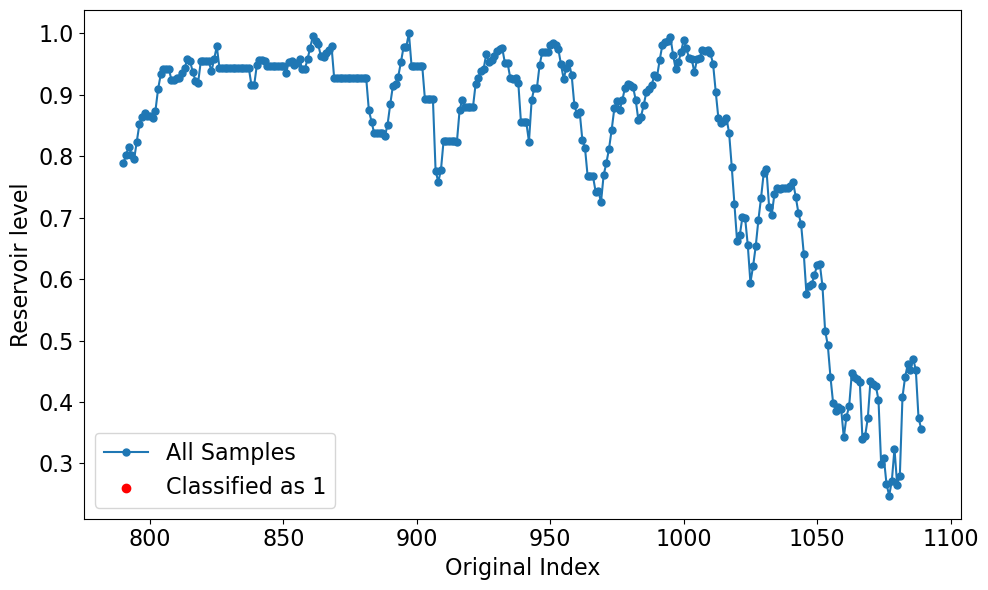

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Paso 1: Aplanar preds_0 para asegurar la comparación correcta
flattened_preds_0 = np.array([p[0] for p in preds_0])  # Extraer los valores escalares de preds_0

# Paso 2: Identificar las posiciones clasificadas como 1
classified_as_1_indices = np.where(flattened_preds_0 == 1)[0]  # Secuencias clasificadas como 1

# Paso 3: Obtener los índices originales para secuencias clasificadas como 1
highlighted_indices = test_indices_0[classified_as_1_indices, 0]  # Primer índice de cada secuencia

# Paso 4: Seleccionar la variable para graficar
selected_variable = test_matrices_0[:, 0, 0]  # Variable 0 en el primer tiempo de cada secuencia

# Step 5: Plot
plt.figure(figsize=(10, 6))

# Plot all samples
plt.plot(test_indices_0[:, 0], selected_variable, 'o-', label='All Samples', markersize=5)

# Highlight samples classified as 1 in red
plt.scatter(
    highlighted_indices,
    selected_variable[classified_as_1_indices],
    color='red',
    label='Classified as 1',
    zorder=5
)

# Add labels, title, and legend
plt.xlabel("Original Index", fontsize=16)
plt.ylabel("Reservoir level", fontsize=16)
plt.legend(fontsize=16)

# Configure ticks
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()

# Save as EPS file
plt.savefig("classified_as_1_case0.eps", format='eps')

# Show the plot
plt.show()

In [29]:
# Evaluar las métricas para el caso 0
accuracy_0, precision_0, recall_0, f1_0, cm_0 = calculate_and_print_metrics(
    test_loss_0, labels_0, preds_0
)

Test Loss: 0.0470
Accuracy: 1.0000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Confusion Matrix:
[[300   0]
 [  0   0]]


C:\Users\Christian\.conda\envs\Pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Christian\.conda\envs\Pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Christian\.conda\envs\Pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


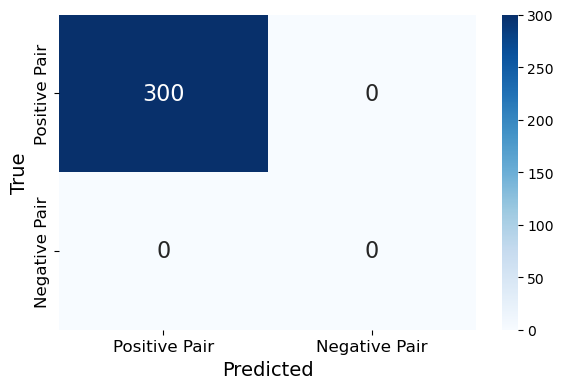

In [30]:
# Graficar la matriz de confusión para el caso 0
plot_confusion_matrix(cm_0, save_path="confusion_matrix_case0.pdf")

# Caso 1a

In [31]:
# Evaluar el modelo en el conjunto de testeo para caso 1a
test_loss_1a, labels_1a, preds_1a, score_1a = evaluate_test_pairs(model, criterion, test_loader_1a, device)

# Imprimir resultados
print(f"Pérdida promedio en el conjunto de testeo (caso 1a): {test_loss_1a:.4f}")
print(f"Etiquetas reales (primeros 10): {labels_1a[:10]}")
print(f"Predicciones (primeros 10): {preds_1a[:10]}")

Pérdida promedio en el conjunto de testeo (caso 1a): 0.0000
Etiquetas reales (primeros 10): [array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32)]
Predicciones (primeros 10): [array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32)]


In [32]:
# Aplanar los valores de preds_1a
flattened_preds_1a = np.array([p[0] for p in preds_1a])

# Identificar las posiciones de las secuencias clasificadas como 0 (errores)
positions_classified_as_0 = np.where(flattened_preds_1a == 0)[0]

# Mostrar las posiciones
print("Posiciones de las secuencias clasificadas como 0:", positions_classified_as_0)

Posiciones de las secuencias clasificadas como 0: []


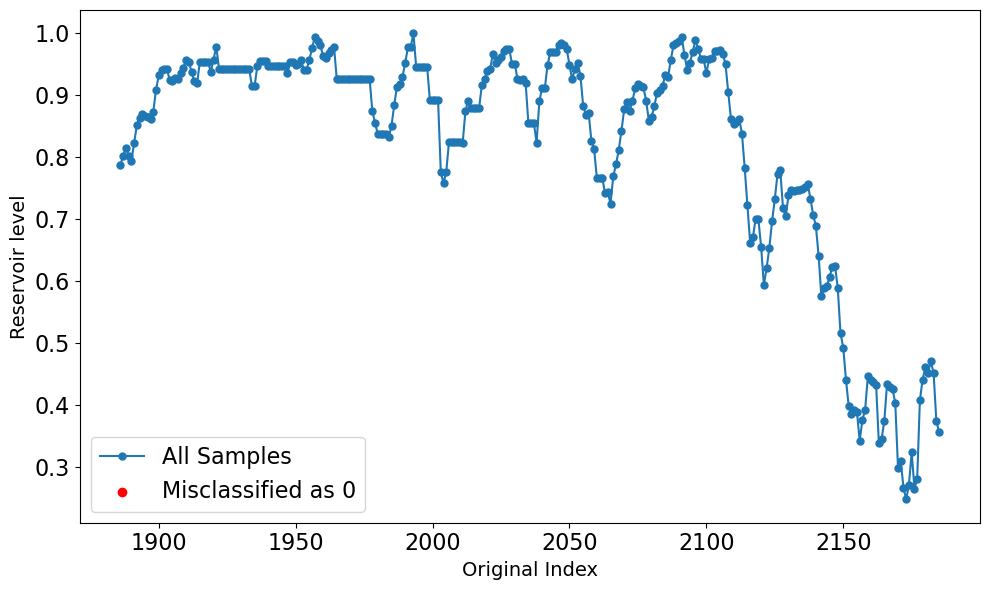

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Paso 1: Aplanar preds_1a para asegurar la comparación correcta
flattened_preds_1a = np.array([p[0] for p in preds_1a])  # Extraer los valores escalares de preds_1a

# Paso 2: Identificar las posiciones clasificadas como 0 (errores)
classified_as_0_indices = np.where(flattened_preds_1a == 0)[0]  # Secuencias clasificadas como 0

# Paso 3: Obtener los índices originales para secuencias clasificadas como 0
highlighted_indices = test_indices_1a[classified_as_0_indices, 0]  # Primer índice de cada secuencia

# Paso 4: Seleccionar la variable para graficar
selected_variable = test_matrices_1a[:, 0, 0]  # Variable 0 en el primer tiempo de cada secuencia

# Step 5: Plot
plt.figure(figsize=(10, 6))

# Plot all samples
plt.plot(test_indices_1a[:, 0], selected_variable, 'o-', label='All Samples', markersize=5)

# Highlight samples misclassified as 0 (errors) in red
plt.scatter(
    highlighted_indices,
    selected_variable[classified_as_0_indices],
    color='red',
    label='Misclassified as 0',
    zorder=5
)

# Add labels, title, and legend
plt.xlabel("Original Index", fontsize=14)
plt.ylabel("Reservoir level", fontsize=14)
plt.legend(fontsize=16)

# Configure ticks
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()

# Save as EPS file
plt.savefig("misclassified_as_0_case1a.pdf", format='pdf')

# Show the plot
plt.show()

In [34]:
# Evaluar las métricas para el caso 1a
accuracy_1a, precision_1a, recall_1a, f1_1a, cm_1a = calculate_and_print_metrics(
    test_loss_1a, labels_1a, preds_1a
)

Test Loss: 0.0000
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[  0   0]
 [  0 300]]


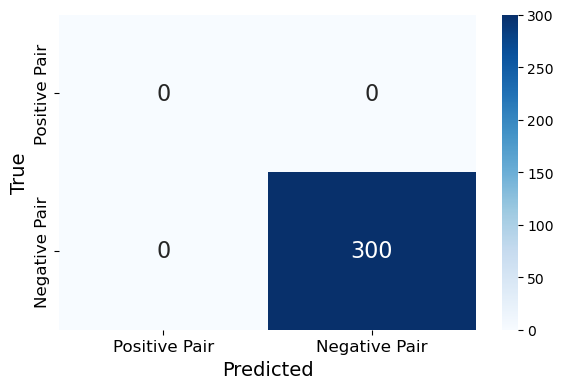

In [35]:
plot_confusion_matrix(cm_1a, save_path="confusion_matrix_case1a.pdf")

# Caso 1b

In [36]:
# Evaluar el modelo en el conjunto de testeo para caso 1b
test_loss_1b, labels_1b, preds_1b, score_1b = evaluate_test_pairs(model, criterion, test_loader_1b, device)

# Imprimir resultados
print(f"Pérdida promedio en el conjunto de testeo (caso 1b): {test_loss_1b:.4f}")
print(f"Etiquetas reales (primeros 10): {labels_1b[:10]}")
print(f"Predicciones (primeros 10): {preds_1b[:10]}")

Pérdida promedio en el conjunto de testeo (caso 1b): 0.2412
Etiquetas reales (primeros 10): [array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32)]
Predicciones (primeros 10): [array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32)]


In [37]:
# Aplanar los valores de preds_1b
flattened_preds_1b = np.array([p[0] for p in preds_1b])

# Identificar las posiciones de las secuencias clasificadas como 0 (errores)
positions_classified_as_0 = np.where(flattened_preds_1b == 0)[0]

# Mostrar las posiciones
print("Posiciones de las secuencias clasificadas como 0:", positions_classified_as_0)

Posiciones de las secuencias clasificadas como 0: [161 162 163 164 165 488 489 514 515 516 517 518 519 520 526 527 528 536
 537 538 539 540 541 542 543 544 551 560 868 872 873 902 904 905 906 907
 908 909 910 911 922 923 924 925 926 927 928 929 930 931 932 947 948 949
 950 952 953 987 988 989 990]


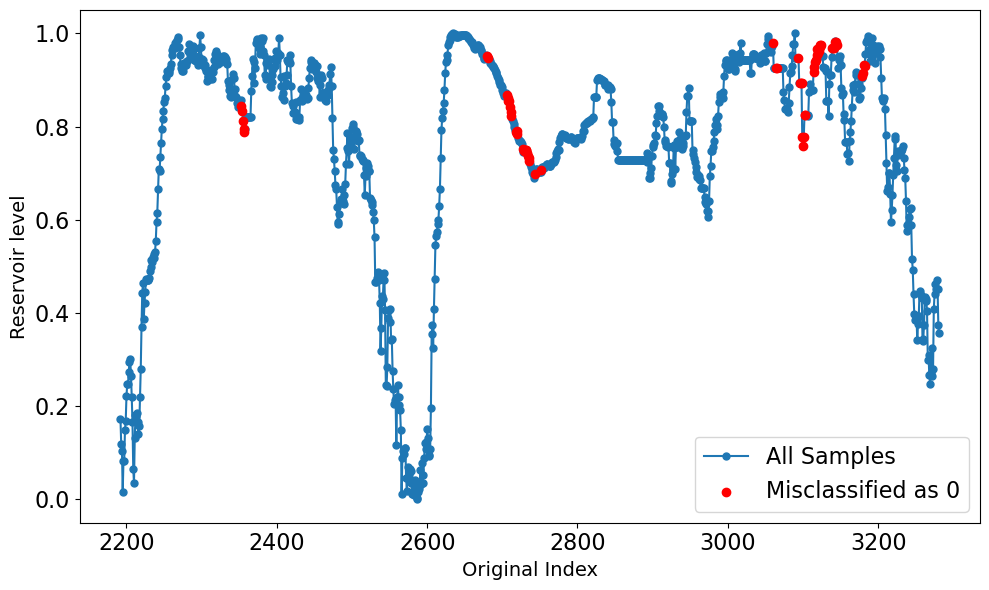

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Paso 1: Aplanar preds_1b para asegurar la comparación correcta
flattened_preds_1b = np.array([p[0] for p in preds_1b])  # Extraer los valores escalares de preds_1b

# Paso 2: Identificar las posiciones clasificadas como 0 (errores)
classified_as_0_indices = np.where(flattened_preds_1b == 0)[0]  # Secuencias clasificadas como 0

# Paso 3: Obtener los índices originales para secuencias clasificadas como 0
highlighted_indices = test_indices_1b[classified_as_0_indices, 0]  # Primer índice de cada secuencia

# Paso 4: Seleccionar la variable para graficar
selected_variable = test_matrices_1b[:, 0, 0]  # Variable 0 en el primer tiempo de cada secuencia

# Step 5: Plot
plt.figure(figsize=(10, 6))

# Plot all samples
plt.plot(test_indices_1b[:, 0], selected_variable, 'o-', label='All Samples', markersize=5)

# Highlight samples misclassified as 0 in red
plt.scatter(
    highlighted_indices,
    selected_variable[classified_as_0_indices],
    color='red',
    label='Misclassified as 0',
    zorder=5
)

# Add labels, title, and legend
plt.xlabel("Original Index", fontsize=14)
plt.ylabel("Reservoir level", fontsize=14)
plt.legend(fontsize=16)

# Configure tick sizes and layout
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()

# Save the plot as an EPS file
plt.savefig("case1b_misclassifications.pdf", format="pdf")

# Show the plot
plt.show()

In [39]:
# Evaluar las métricas para el caso 1b
accuracy_1b, precision_1b, recall_1b, f1_1b, cm_1b = calculate_and_print_metrics(
    test_loss_1b, labels_1b, preds_1b
)

Test Loss: 0.2412
Accuracy: 0.9440
Precision: 1.0000
Recall: 0.9440
F1 Score: 0.9712
Confusion Matrix:
[[   0    0]
 [  61 1029]]


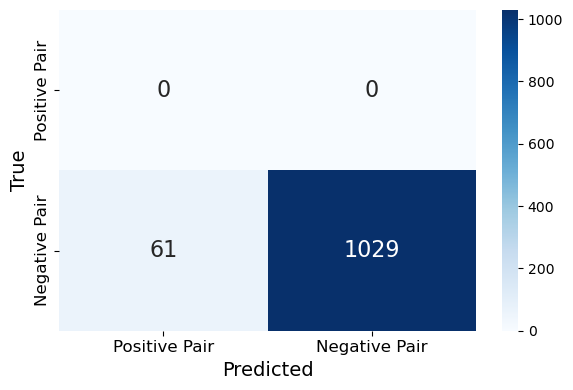

In [40]:
# Graficar la matriz de confusión corregida
plot_confusion_matrix(cm_1b, save_path="confusion_matrix_case1b.pdf")

# Caso 2a

In [41]:
# Evaluar el modelo en el conjunto de testeo para caso 2a
test_loss_2a, labels_2a, preds_2a, score_2a = evaluate_test_pairs(model, criterion, test_loader_2a, device)

# Imprimir resultados
print(f"Pérdida promedio en el conjunto de testeo (caso 2a): {test_loss_2a:.4f}")
print(f"Etiquetas reales (primeros 10): {labels_2a[:10]}")
print(f"Predicciones (primeros 10): {preds_2a[:10]}")

Pérdida promedio en el conjunto de testeo (caso 2a): 0.0000
Etiquetas reales (primeros 10): [array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32)]
Predicciones (primeros 10): [array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32)]


In [42]:
# Aplanar los valores de preds_2a
flattened_preds_2a = np.array([p[0] for p in preds_2a])

# Identificar las posiciones de las secuencias clasificadas como 0 (errores)
positions_classified_as_0 = np.where(flattened_preds_2a == 0)[0]

# Mostrar las posiciones
print("Posiciones de las secuencias clasificadas como 0:", positions_classified_as_0)


Posiciones de las secuencias clasificadas como 0: []


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


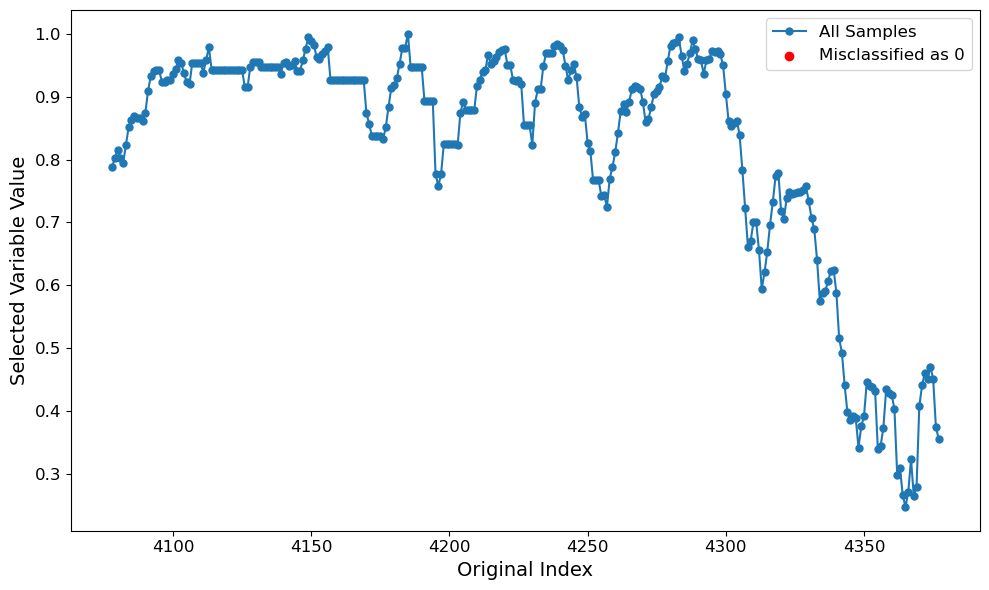

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Paso 1: Aplanar preds_2a para asegurar la comparación correcta
flattened_preds_2a = np.array([p[0] for p in preds_2a])  # Extraer los valores escalares de preds_2a

# Paso 2: Identificar las posiciones clasificadas como 0 (errores)
classified_as_0_indices = np.where(flattened_preds_2a == 0)[0]  # Secuencias clasificadas como 0

# Paso 3: Obtener los índices originales para secuencias clasificadas como 0
highlighted_indices = test_indices_2a[classified_as_0_indices, 0]  # Primer índice de cada secuencia

# Paso 4: Seleccionar la variable para graficar
selected_variable = test_matrices_2a[:, 0, 0]  # Variable 0 en el primer tiempo de cada secuencia

# Step 5: Plot
plt.figure(figsize=(10, 6))

# Plot all samples
plt.plot(test_indices_2a[:, 0], selected_variable, 'o-', label='All Samples', markersize=5)

# Highlight misclassified sequences as 0 in red
plt.scatter(
    highlighted_indices,
    selected_variable[classified_as_0_indices],
    color='red',
    label='Misclassified as 0',
    zorder=5
)

# Add labels, title, and legend
plt.xlabel("Original Index", fontsize=14)
plt.ylabel("Selected Variable Value", fontsize=14)

plt.legend(fontsize=12)

# Configure ticks and layout
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save the plot as an EPS file
plt.savefig("case2a_misclassifications.eps", format="eps")

# Show the plot
plt.show()

In [44]:
# Evaluar las métricas para el caso 2a
accuracy_2a, precision_2a, recall_2a, f1_2a, cm_2a = calculate_and_print_metrics(
    test_loss_2a, labels_2a, preds_2a
)

Test Loss: 0.0000
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[  0   0]
 [  0 300]]


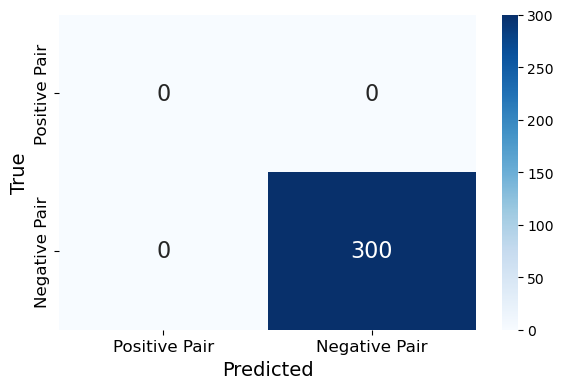

In [45]:
# Graficar la matriz de confusión corregida
plot_confusion_matrix(cm_2a, save_path="confusion_matrix_case2a.eps")

# Caso 2b

In [46]:
# Evaluar el modelo en el conjunto de testeo para caso 2b
test_loss_2b, labels_2b, preds_2b, score_2b = evaluate_test_pairs(model, criterion, test_loader_2b, device)

# Imprimir resultados
print(f"Pérdida promedio en el conjunto de testeo (caso 2b): {test_loss_2b:.4f}")
print(f"Etiquetas reales (primeros 10): {labels_2b[:10]}")
print(f"Predicciones (primeros 10): {preds_2b[:10]}")

Pérdida promedio en el conjunto de testeo (caso 2b): 0.0000
Etiquetas reales (primeros 10): [array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32)]
Predicciones (primeros 10): [array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32)]


In [47]:
# Aplanar los valores de preds_2b
flattened_preds_2b = np.array([p[0] for p in preds_2b])

# Identificar las posiciones de las secuencias clasificadas como 0 (errores)
positions_classified_as_0 = np.where(flattened_preds_2b == 0)[0]

# Mostrar las posiciones
print("Posiciones de las secuencias clasificadas como 0:", positions_classified_as_0)

Posiciones de las secuencias clasificadas como 0: []


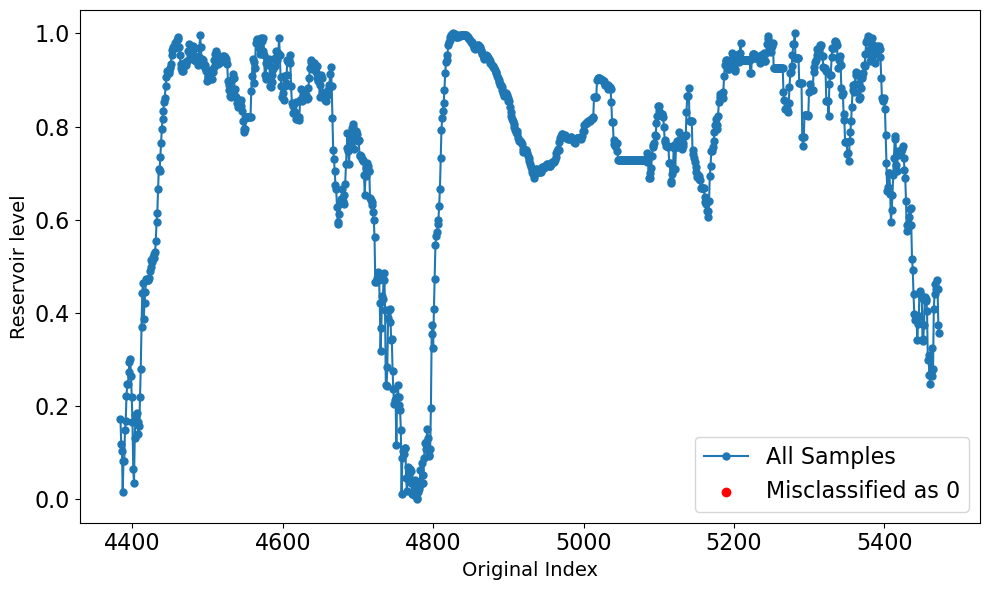

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Paso 1: Aplanar preds_2b para asegurar la comparación correcta
flattened_preds_2b = np.array([p[0] for p in preds_2b])  # Extraer los valores escalares de preds_2b

# Paso 2: Identificar las posiciones clasificadas como 0 (errores)
classified_as_0_indices = np.where(flattened_preds_2b == 0)[0]  # Secuencias clasificadas como 0

# Paso 3: Obtener los índices originales para secuencias clasificadas como 0
highlighted_indices = test_indices_2b[classified_as_0_indices, 0]  # Primer índice de cada secuencia

# Paso 4: Seleccionar la variable para graficar
selected_variable = test_matrices_2b[:, 0, 0]  # Variable 0 en el primer tiempo de cada secuencia

# Step 5: Plot
plt.figure(figsize=(10, 6))

# Plot all samples
plt.plot(test_indices_2b[:, 0], selected_variable, 'o-', label='All Samples', markersize=5)

# Highlight misclassified sequences as 0 in red
plt.scatter(
    highlighted_indices,
    selected_variable[classified_as_0_indices],
    color='red',
    label='Misclassified as 0',
    zorder=5
)

# Add labels, title, and legend
plt.xlabel("Original Index", fontsize=14)
plt.ylabel("Reservoir level", fontsize=14)
plt.legend(fontsize=16)

# Configure ticks and layout
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()

# Save the plot as an EPS file
plt.savefig("case2b_misclassifications.pdf", format="pdf")

# Show the plot
plt.show()


In [49]:
# Evaluar las métricas para el caso 2b
accuracy_2b, precision_2b, recall_2b, f1_2b, cm_2b = calculate_and_print_metrics(
    test_loss_2b, labels_2b, preds_2b
)

Test Loss: 0.0000
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[   0    0]
 [   0 1090]]


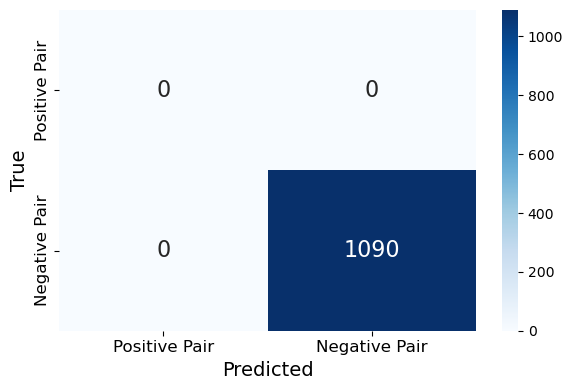

In [50]:
# Graficar la matriz de confusión corregida
plot_confusion_matrix(cm_2b, save_path="confusion_matrix_case2b.pdf")

# Caso 3a

In [51]:
# Evaluar el modelo en el conjunto de testeo para caso 3a
test_loss_3a, labels_3a, preds_3a, score_3a = evaluate_test_pairs(model, criterion, test_loader_3a, device)

# Imprimir resultados
print(f"Pérdida promedio en el conjunto de testeo (caso 3a): {test_loss_3a:.4f}")
print(f"Etiquetas reales (primeros 10): {labels_3a[:10]}")
print(f"Predicciones (primeros 10): {preds_3a[:10]}")

Pérdida promedio en el conjunto de testeo (caso 3a): 0.0017
Etiquetas reales (primeros 10): [array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32)]
Predicciones (primeros 10): [array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32)]


In [52]:
# Aplanar los valores de preds_3a
flattened_preds_3a = np.array([p[0] for p in preds_3a])

# Identificar las posiciones de las secuencias clasificadas como 0 (errores)
positions_classified_as_0 = np.where(flattened_preds_3a == 0)[0]

# Mostrar las posiciones
print("Posiciones de las secuencias clasificadas como 0:", positions_classified_as_0)

Posiciones de las secuencias clasificadas como 0: []


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


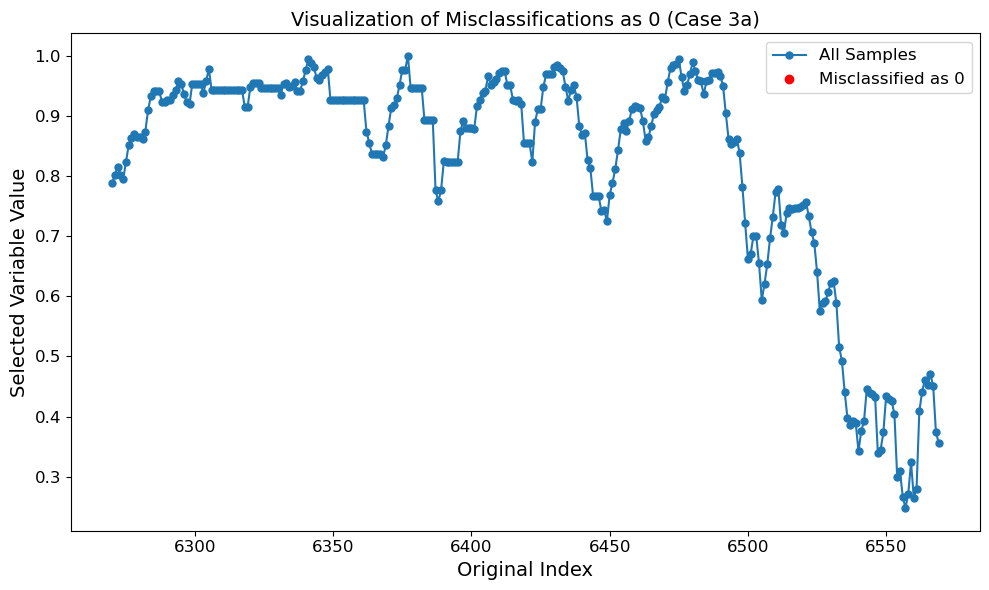

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Paso 1: Aplanar preds_3a para asegurar la comparación correcta
flattened_preds_3a = np.array([p[0] for p in preds_3a])  # Extraer los valores escalares de preds_3a

# Paso 2: Identificar las posiciones clasificadas como 0 (errores)
classified_as_0_indices = np.where(flattened_preds_3a == 0)[0]  # Secuencias clasificadas como 0

# Paso 3: Obtener los índices originales para secuencias clasificadas como 0
highlighted_indices = test_indices_3a[classified_as_0_indices, 0]  # Primer índice de cada secuencia

# Paso 4: Seleccionar la variable para graficar
selected_variable = test_matrices_3a[:, 0, 0]  # Variable 0 en el primer tiempo de cada secuencia

# Step 5: Plot
plt.figure(figsize=(10, 6))

# Plot all samples
plt.plot(test_indices_3a[:, 0], selected_variable, 'o-', label='All Samples', markersize=5)

# Highlight misclassified sequences as 0 in red
plt.scatter(
    highlighted_indices,
    selected_variable[classified_as_0_indices],
    color='red',
    label='Misclassified as 0',
    zorder=5
)

# Add labels, title, and legend
plt.xlabel("Original Index", fontsize=14)
plt.ylabel("Selected Variable Value", fontsize=14)
plt.title("Visualization of Misclassifications as 0 (Case 3a)", fontsize=14)
plt.legend(fontsize=12)

# Configure ticks and layout
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save the plot as an EPS file
plt.savefig("case3a_miscclassifications.eps", format="eps")


# Show the plot
plt.show()

In [54]:
# Evaluar las métricas para el caso 3a
accuracy_3a, precision_3a, recall_3a, f1_3a, cm_3a = calculate_and_print_metrics(
    test_loss_3a, labels_3a, preds_3a
)

Test Loss: 0.0017
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[  0   0]
 [  0 300]]


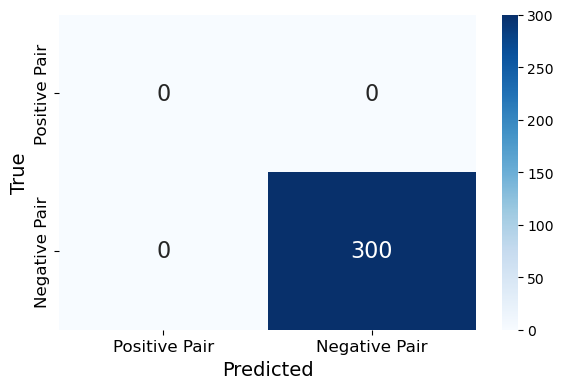

In [55]:
# Graficar la matriz de confusión corregida
plot_confusion_matrix(cm_3a, save_path="confusion_matrix_case3a.eps")

# Caso 3b

In [56]:
# Evaluar el modelo en el conjunto de testeo para caso 3b
test_loss_3b, labels_3b, preds_3b, score_3b = evaluate_test_pairs(model, criterion, test_loader_3b, device)

# Imprimir resultados
print(f"Pérdida promedio en el conjunto de testeo (caso 3b): {test_loss_3b:.4f}")
print(f"Etiquetas reales (primeros 10): {labels_3b[:10]}")
print(f"Predicciones (primeros 10): {preds_3b[:10]}")

Pérdida promedio en el conjunto de testeo (caso 3b): 0.0000
Etiquetas reales (primeros 10): [array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32)]
Predicciones (primeros 10): [array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32)]


In [57]:
# Aplanar los valores de preds_3b
flattened_preds_3b = np.array([p[0] for p in preds_3b])

# Identificar las posiciones de las secuencias clasificadas como 0 (errores)
positions_classified_as_0 = np.where(flattened_preds_3b == 0)[0]

# Mostrar las posiciones
print("Posiciones de las secuencias clasificadas como 0:", positions_classified_as_0)

Posiciones de las secuencias clasificadas como 0: []


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


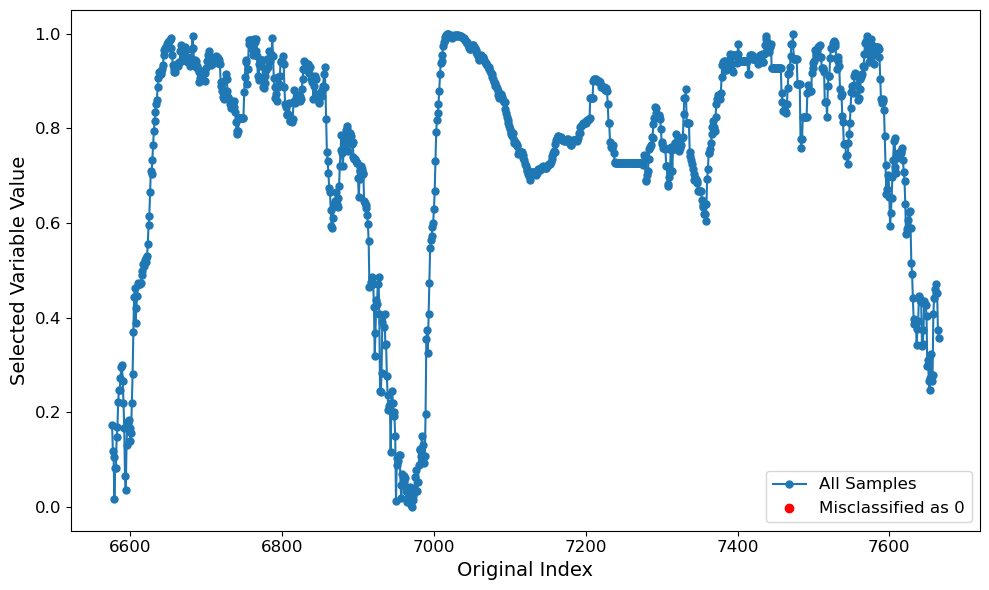

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Paso 1: Aplanar preds_3b para asegurar la comparación correcta
flattened_preds_3b = np.array([p[0] for p in preds_3b])  # Extraer los valores escalares de preds_3b

# Paso 2: Identificar las posiciones clasificadas como 0 (errores)
classified_as_0_indices = np.where(flattened_preds_3b == 0)[0]  # Secuencias clasificadas como 0

# Paso 3: Obtener los índices originales para secuencias clasificadas como 0
highlighted_indices = test_indices_3b[classified_as_0_indices, 0]  # Primer índice de cada secuencia

# Paso 4: Seleccionar la variable para graficar
selected_variable = test_matrices_3b[:, 0, 0]  # Variable 0 en el primer tiempo de cada secuencia

# Step 5: Plot
plt.figure(figsize=(10, 6))

# Plot all samples
plt.plot(test_indices_3b[:, 0], selected_variable, 'o-', label='All Samples', markersize=5)

# Highlight misclassified sequences as 0 in red
plt.scatter(
    highlighted_indices,
    selected_variable[classified_as_0_indices],
    color='red',
    label='Misclassified as 0',
    zorder=5
)

# Add labels, title, and legend
plt.xlabel("Original Index", fontsize=14)
plt.ylabel("Selected Variable Value", fontsize=14)
plt.legend(fontsize=12)

# Configure ticks and layout
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save the plot as an EPS file
plt.savefig("case3b_misclassifications.eps", format="eps")

# Show the plot
plt.show()

In [59]:
# Evaluar las métricas para el caso 3b
accuracy_3b, precision_3b, recall_3b, f1_3b, cm_3b = calculate_and_print_metrics(
    test_loss_3b, labels_3b, preds_3b
)

Test Loss: 0.0000
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[   0    0]
 [   0 1090]]


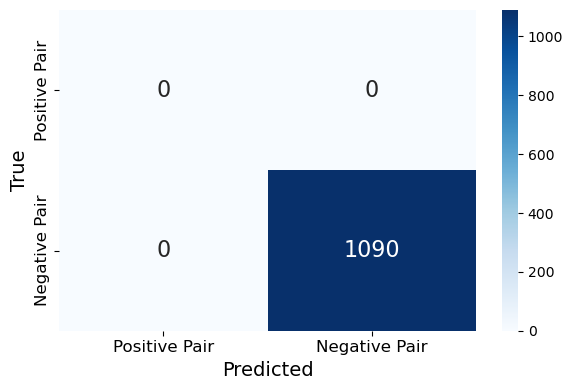

In [60]:
# Graficar la matriz de confusión corregida
plot_confusion_matrix(cm_3b, save_path="confusion_matrix_case3b.pdf")

# Caso 4

In [61]:
# Evaluar el modelo en el conjunto de testeo para caso 4
test_loss_4, labels_4, preds_4, score_4 = evaluate_test_pairs(model, criterion, test_loader_4, device)

# Imprimir resultados
print(f"Pérdida promedio en el conjunto de testeo (caso 4): {test_loss_4:.4f}")
print(f"Etiquetas reales (primeros 10): {labels_4[:10]}")
print(f"Predicciones (primeros 10): {preds_4[:10]}")

Pérdida promedio en el conjunto de testeo (caso 4): 0.0000
Etiquetas reales (primeros 10): [array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32)]
Predicciones (primeros 10): [array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32)]


In [62]:
# Aplanar los valores de preds_4
flattened_preds_4 = np.array([p[0] for p in preds_4])

# Identificar las posiciones de las secuencias clasificadas como 0 (errores)
positions_classified_as_0 = np.where(flattened_preds_4 == 0)[0]

# Mostrar las posiciones
print("Posiciones de las secuencias clasificadas como 0:", positions_classified_as_0)

Posiciones de las secuencias clasificadas como 0: []


In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Paso 1: Aplanar preds_4 para asegurar la comparación correcta
flattened_preds_4 = np.array([p[0] for p in preds_4])  # Extraer los valores escalares de preds_4

# Paso 2: Identificar las posiciones clasificadas como 0 (errores)
classified_as_0_indices = np.where(flattened_preds_4 == 0)[0]  # Secuencias clasificadas como 0

# Paso 3: Obtener los índices originales para secuencias clasificadas como 0
highlighted_indices = test_indices_4[classified_as_0_indices, 0]  # Primer índice de cada secuencia

# Paso 4: Seleccionar la variable para graficar
selected_variable = test_matrices_4[:, 0, 0]  # Variable 0 en el primer tiempo de cada secuencia

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


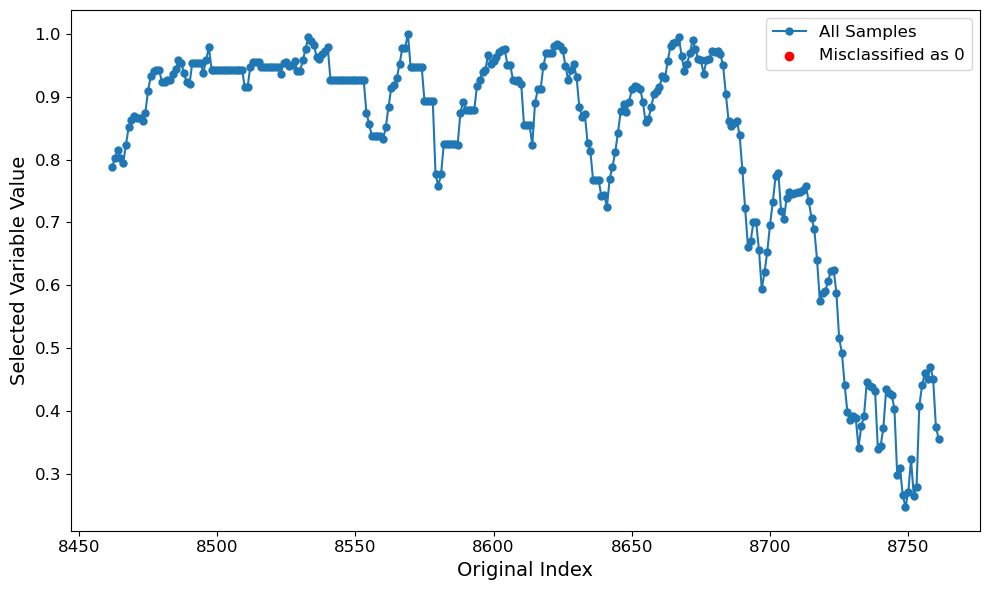

In [64]:
# Step 5: Plot
plt.figure(figsize=(10, 6))

# Plot all samples
plt.plot(test_indices_4[:, 0], selected_variable, 'o-', label='All Samples', markersize=5)

# Highlight misclassified sequences as 0 in red
plt.scatter(
    highlighted_indices,
    selected_variable[classified_as_0_indices],
    color='red',
    label='Misclassified as 0',
    zorder=5
)

# Add labels, title, and legend
plt.xlabel("Original Index", fontsize=14)
plt.ylabel("Selected Variable Value", fontsize=14)
plt.legend(fontsize=12)

# Configure ticks and layout
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save the plot as an EPS file
plt.savefig("case4_misclassifications.eps", format="eps")

# Show the plot
plt.show()

In [65]:
# Evaluar las métricas para el caso 4
accuracy_4, precision_4, recall_4, f1_4, cm_4 = calculate_and_print_metrics(
    test_loss_4, labels_4, preds_4
)

Test Loss: 0.0000
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[  0   0]
 [  0 300]]


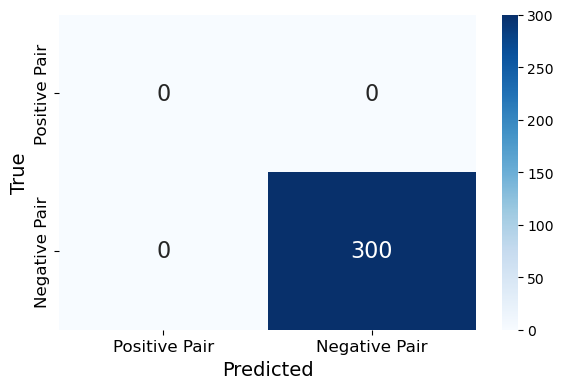

In [66]:
# Graficar la matriz de confusión corregida
plot_confusion_matrix(cm_4, save_path="confusion_matrix_case4.eps")

# CURVA ROC

In [67]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

In [68]:
def concat_pairs(*pairs):
    """
    Concatena uno o varios pares (scores, labels) en dos vectores 1-D.

    Cada `scores` y `labels`:
        • Pueden ser lista, tupla o np.ndarray
        • Pueden venir como escalares/mini-arrays de longitud 1
        • Deben tener la misma longitud entre sí

    Parámetros
    ----------
    *pairs : (scores, labels)
        Uno o más pares.  Ej:
            concat_pairs((score_0, labels_0),
                         (score_1a, labels_1a),
                         (score_1b, labels_1b))

    Devuelve
    --------
    y_true  : np.ndarray shape (N,)  int
    y_score : np.ndarray shape (N,)  float
    """
    if len(pairs) == 0:
        raise ValueError("Se debe pasar al menos un par (scores, labels).")

    y_score_parts, y_true_parts = [], []

    for idx, (scores, labels) in enumerate(pairs, start=1):
        s = np.asarray(scores).ravel().astype(float)
        l = np.asarray(labels).ravel().astype(int)

        if s.size != l.size:
            raise ValueError(f"Par #{idx}: scores ({s.size}) y labels ({l.size}) difieren en longitud.")

        y_score_parts.append(s)
        y_true_parts.append(l)

    y_score = np.concatenate(y_score_parts)
    y_true  = np.concatenate(y_true_parts)

    return y_true, y_score


In [69]:
y_true, y_score = concat_pairs(
    (score_0,  labels_0),
    (score_1a, labels_1a),
    (score_1b, labels_1b),
    (score_2a, labels_2a),
    (score_2b, labels_2b),
    (score_4,  labels_4)
)

In [70]:
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

In [71]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [72]:
tpr

array([0.        , 0.18441558, 0.29577922, 0.33636364, 0.36655844,
       0.38733766, 0.40097403, 0.41168831, 0.42402597, 0.43181818,
       0.44253247, 0.45032468, 0.46655844, 0.47272727, 0.48214286,
       0.48831169, 0.49675325, 0.50194805, 0.50649351, 0.51136364,
       0.51493506, 0.51818182, 0.52045455, 0.52532468, 0.52954545,
       0.53344156, 0.53603896, 0.53993506, 0.54318182, 0.54707792,
       0.54902597, 0.5512987 , 0.55194805, 0.55487013, 0.55844156,
       0.56233766, 0.56493506, 0.56590909, 0.5711039 , 0.57402597,
       0.57532468, 0.57792208, 0.57922078, 0.58019481, 0.58149351,
       0.58311688, 0.58701299, 0.58863636, 0.59090909, 0.59383117,
       0.59545455, 0.59772727, 0.60097403, 0.6012987 , 0.60292208,
       0.6038961 , 0.60519481, 0.60746753, 0.60811688, 0.60941558,
       0.61038961, 0.61298701, 0.61461039, 0.61493506, 0.61688312,
       0.61915584, 0.62402597, 0.625     , 0.6262987 , 0.62792208,
       0.63084416, 0.63344156, 0.63376623, 0.63441558, 0.63474

In [73]:
thresholds

array([1.99999988e+00, 9.99999881e-01, 9.99999762e-01, 9.99999642e-01,
       9.99999523e-01, 9.99999404e-01, 9.99999285e-01, 9.99999166e-01,
       9.99999046e-01, 9.99998927e-01, 9.99998808e-01, 9.99998689e-01,
       9.99998450e-01, 9.99998331e-01, 9.99998212e-01, 9.99998093e-01,
       9.99997854e-01, 9.99997735e-01, 9.99997616e-01, 9.99997497e-01,
       9.99997377e-01, 9.99997258e-01, 9.99997139e-01, 9.99997020e-01,
       9.99996901e-01, 9.99996781e-01, 9.99996662e-01, 9.99996543e-01,
       9.99996424e-01, 9.99996305e-01, 9.99996185e-01, 9.99996066e-01,
       9.99995947e-01, 9.99995828e-01, 9.99995708e-01, 9.99995589e-01,
       9.99995470e-01, 9.99995351e-01, 9.99995112e-01, 9.99994993e-01,
       9.99994874e-01, 9.99994755e-01, 9.99994636e-01, 9.99994516e-01,
       9.99994397e-01, 9.99994278e-01, 9.99994159e-01, 9.99994040e-01,
       9.99993920e-01, 9.99993801e-01, 9.99993682e-01, 9.99993563e-01,
       9.99993324e-01, 9.99993205e-01, 9.99993086e-01, 9.99992967e-01,
      

In [74]:
roc_auc

0.9937348484848484

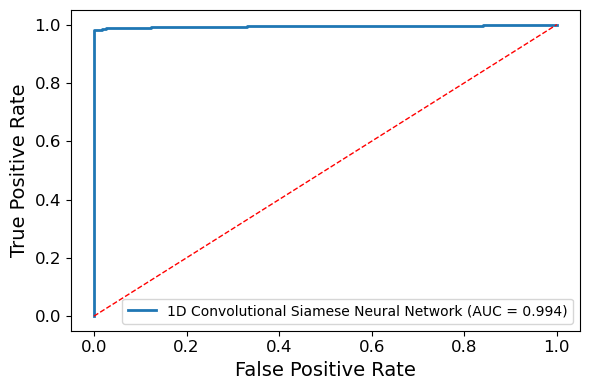

In [75]:
plt.figure(figsize=(6, 4))                       # same canvas size
plt.plot(
    fpr,
    tpr,
    linewidth=2,
    label=f"1D Convolutional Siamese Neural Network (AUC = {roc_auc:.3f})"
)

# dashed diagonal for reference (now in red)
plt.plot([0, 1], [0, 1], linestyle="--", color="red", linewidth=1)

# axis labels and font sizes
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate',  fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# legend with larger font
plt.legend(prop={'size': 10}, loc="lower right")

plt.tight_layout()
plt.savefig("roc_siamese.pdf", format='pdf', dpi=300, bbox_inches="tight")
plt.show()